# Significance Annotations with Lets-Plot

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} mizani

Channels:
 - defaults
 - conda-forge
 - jetbrains
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu
from mizani.labels import label_pvalue

from lets_plot import *


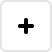
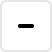
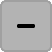
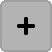
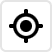
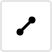
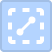
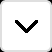
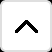
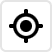
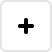
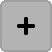
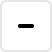
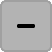
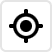
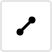
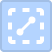
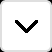
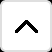
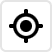

In [3]:
LetsPlot.setup_html()

## Data Preparation

### Basic Dataset

In [4]:
def get_data(url, *, cat_col):
    df = pd.read_csv(url)
    categories = df[cat_col].unique().tolist()
    drv_cat = pd.Categorical(df[cat_col], categories=categories, ordered=True)
    df = df.assign(drv_idx=drv_cat.codes)
    return df

mpg_df = get_data("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv", cat_col="drv")
print(mpg_df.shape)
mpg_df.head(3)

(234, 13)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,drv_idx
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0


### Annotations Dataset

In [5]:
def get_p_value(df, cat_col, val_col, g1, g2):
    x = df.loc[df[cat_col] == g1, val_col]
    y = df.loc[df[cat_col] == g2, val_col]
    return mannwhitneyu(x, y, alternative="two-sided").pvalue

def get_p_values_data(df, *, cat_col, val_col, step, base_dy=4):
    from itertools import combinations
    y_min, y_max = df[val_col].min(), df[val_col].max()
    y_base = y_max + base_dy
    step = max((y_max - y_min) * 0.2, 1.0)
    categories = df[cat_col].unique().tolist()
    rows = []
    for i, (a, b) in enumerate(combinations(categories, 2)):
        xmin, xmax = categories.index(a), categories.index(b)
        y = y_base + i * step
        p = get_p_value(df, cat_col, val_col, a, b)
        rows.append(dict(
            xmin=xmin, xmax=xmax, y=y,
            label=p
        ))
    return pd.DataFrame(rows)

annotations_df = get_p_values_data(mpg_df, cat_col="drv", val_col="hwy", step=1.0)
print(annotations_df.shape)
annotations_df

(3, 4)


,xmin,xmax,y,label
0,0,1,48.0,9.041090e-28
1,0,2,54.4,5.955333e-11
2,1,2,60.8,4.104577e-02


## Plots

### Default Annotations

In [6]:
p = ggplot() + geom_boxplot(aes("drv", "hwy"), data=mpg_df)

In [7]:
p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="label"), data=annotations_df)

### With `label_pvalue()`

#### Default Parameters

In [8]:
formatter1 = label_pvalue()
annotations_df = annotations_df.assign(formatted_label_1=lambda d: formatter1(d["label"]))

p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="formatted_label_1"), data=annotations_df)

#### `accuracy=.01`

In [9]:
formatter2 = label_pvalue(accuracy=.01)
annotations_df = annotations_df.assign(formatted_label_2=lambda d: formatter2(d["label"]))

p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="formatted_label_2"), data=annotations_df)

#### `add_p=True`

In [10]:
formatter3 = label_pvalue(add_p=True)
annotations_df = annotations_df.assign(formatted_label_3=lambda d: formatter3(d["label"]))

p + geom_bracket(aes(xmin="xmin", xmax="xmax", y="y", label="formatted_label_3"), data=annotations_df)